# CMPINF0010 Lab Final Project

Your final project is, at least ideally, the conjoining of everything you've learned in the course so far. You'll be using many of the big ideas you've learned, your Python skills, command-line and `git`, and plenty of pandas and data viz. 

You will be working in teams (assigned below) to make a data driven argument that answers the following question:

## What is the best neighborhood in Pittsburgh?

Using data from the WPRDC, you will create a data driven argument to support your claim about the “best” neighborhood in Pittsburgh.

With your group members, you will be creating a Jupyter notebook to demonstrate your argument and the data analysis you did to support it. You will present your arguments to the class in the last few weeks of lab.

To answer this question you need to do the following:

* Come up with a team name!
* As a group, come up with some ways of defining and measuring "bestness". Each group member will be responsible for **one metric each.**
* Use at least 3 datasets in your argument. The easiest way to meet this requirement is for each member to choose their own _unique_ dataset to analyze their metric.
* Combine your metrics into a single metric as you see fit.
* Create a git repository to store your data and notebooks and code.


**Note**: There is a lot of subjectivity here, to wit, *what does "best" mean?*. One of your tasks in this project is to come up with your own metric for “best” and then use it to analyze data to determine the best neighborhood. The goal of this final project is to work as a team to develop a metric, apply it, and write up the results.

You could define "best" as the smartest and then define smartness as "number of advanced degree holders living in the neighborhood". Or you might also define best as the ratio of the ”number of potholes" and the “number of trees” in the neighborhood (lower or higher, the decision is up to you). How you want to measure bestness is up to you.

----

You'll be dealing with WPRDC data to talk about Pittsburgh, so here's a guide to working with the WPRDC.

## Adam Karl, Bailey Mathien

In [1]:
import pandas as pd
import numpy as np

## POPULATION

In [2]:
all_pop = pd.read_excel("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/b7156251-6036-4b68-ad2a-95566c84343e/download/opendata-pghsnap-neighborhood-census-data.xlsx")
num_neighborhoods = all_pop["Neighborhood"].count()
all_pop.head()

,Neighborhood,Sector #,Pop. 1940,Pop. 1950,Pop. 1960,Pop. 1970,Pop. 1980,Pop. 1990,Pop. 2000,Pop. 2010,...,% Other (2010),% White (2010),% 2+ Races (2010),% Hispanic (of any race) (2010),% Pop. Age < 5 (2010),% Pop. Age 5-19 (2010),% Pop. Age 20-34 (2010),% Pop. Age 35-59 (2010),% Pop. Age 60-74 (2010),% Pop. Age > 75 (2010)
0,Allegheny Center,3,4521,3862,2512,632,1586,1262,886,933,...,0.006431,0.408360,0.0397,0.029,0.0419,0.2170,0.2757,0.2243,0.1761,0.0650
1,Allegheny West,3,3210,3313,2170,1124,820,654,508,462,...,0.006494,0.766234,0.0303,0.028,0.0000,0.0000,0.0837,0.6820,0.1255,0.1088
2,Allentown,6,8227,7487,6416,5361,4292,3600,3220,2500,...,0.008000,0.594000,0.0464,0.023,0.0366,0.1485,0.2411,0.3530,0.1440,0.0767
3,Arlington,7,2702,3203,4430,3949,2294,2210,1999,1869,...,0.003745,0.764580,0.0316,0.014,0.0691,0.1889,0.1945,0.3153,0.0888,0.1433
4,Arlington Heights,7,2413,2860,2272,2037,1466,1497,238,244,...,0.016393,0.094262,0.0492,0.008,0.0410,0.3925,0.1638,0.3072,0.0341,0.0614


In [3]:
pop = all_pop.filter(["Neighborhood","Pop. 2010"])
pop = pop.rename(columns={pop.columns[1]:"population"})
pop.sort_values(by=["population"], ascending=False)


,Neighborhood,population
76,Squirrel Hill South,15110
67,Shadyside,13915
13,Brookline,13214
75,Squirrel Hill North,11363
55,North Oakland,10551
...,...,...
86,West End,254
4,Arlington Heights,244
77,St. Clair,209
70,South Shore,19


# Playgrounds

In [4]:
all_playgrounds = pd.read_csv("https://data.wprdc.org/datastore/dump/47350364-44a8-4d15-b6e0-5f79ddff9367")  
all_playgrounds

,id,name,type,maintenance_responsibility,park,street,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,731501774,Able Long Playground,NaN,Parks - Western,Able Long Park,COAST AVE,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003192000,5,19,6,4-28,40.408365,-80.028445
1,1461276747,Albert Graham Playground,NaN,Parks - Schenley,Albert Turk Graham Park,FORESIDE PL,https://tools.wprdc.org/images/pittsburgh/play...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440519,-79.984137
2,1860709784,Alpine Playground,NaN,Parks - Northern,Alpine Gardens Park,ALPINE AVE,https://tools.wprdc.org/images/pittsburgh/play...,Central Northside,6,25,42003250300,1,25,1,1-21,40.457707,-80.012952
3,1770671485,Alton Playground,NaN,Parks - Western,Alton Park,ANDICK WAY,https://tools.wprdc.org/images/pittsburgh/play...,Beechview,4,19,42003191600,5,19,6,4-28,40.414137,-80.021831
4,18942817,Ammon Playground,NaN,Parks - Schenley,Ammon Park,MEMORY LN,https://tools.wprdc.org/images/pittsburgh/play...,Bedford Dwellings,6,5,42003050900,3,5,2,2-5,40.449037,-79.978064
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,680315308,Wightman Playground,NaN,Parks - Eastern,Wightman Park,SOLWAY ST,https://tools.wprdc.org/images/pittsburgh/play...,Squirrel Hill North,8,14,42003140300,3,14,4,2-18,40.443330,-79.926454
117,1998890669,Winters Playground,NaN,Parks - Southern,Winters Park,HURON ST,https://tools.wprdc.org/images/pittsburgh/play...,South Side Slopes,3,17,42003170600,3,17,3,4-3,40.422932,-79.981292
118,815926730,Woods Run Playground,NaN,Parks - Northern,Woods Run Park,CENTRAL AVE,https://tools.wprdc.org/images/pittsburgh/play...,Marshall-Shadeland,1,27,42003271500,1,27,1,1-14,40.476348,-80.029265
119,1137558943,Martin Luther King Playground,NaN,Parks - Northern,Allegheny Commons,E NORTH AVE,https://tools.wprdc.org/images/pittsburgh/play...,Allegheny Center,1,22,42003562700,1,22,1,1-6,40.455281,-80.004696


**Combine with population data**

In [5]:
total = pop
total["num_playgrounds"] = 0
for index, row in all_playgrounds.iterrows():
    name = row.iloc[7]
    total.loc[total["Neighborhood"] == name, "num_playgrounds"] += 1
total.sort_values(by=["num_playgrounds"], ascending=False)


,Neighborhood,population,num_playgrounds
76,Squirrel Hill South,15110,8
72,South Side Slopes,4423,5
7,Beechview,7974,5
0,Allegheny Center,933,4
68,Sheraden,5299,4
...,...,...,...
14,California-Kirkbride,761,0
59,Overbrook,3644,0
25,East Allegheny,2136,0
56,North Shore,303,0


**Calculate Playgrounds/population**

In [6]:
total.loc[0, "playgrounds per 1000 people"] = 0
total["playgrounds per 1000 people"] = total["num_playgrounds"].divide(total["population"], fill_value=0)
total["playgrounds per 1000 people"] *= 1000
total["playgrounds per 1000 people"] = total["playgrounds per 1000 people"]
total.sort_values(by=["playgrounds per 1000 people"], ascending=False)

,Neighborhood,population,num_playgrounds,playgrounds per 1000 people
0,Allegheny Center,933,4,4.287245
86,West End,254,1,3.937008
30,Esplen,301,1,3.322259
37,Hays,362,1,2.762431
26,East Carnegie,570,1,1.754386
...,...,...,...,...
57,Northview Heights,1214,0,0.000000
59,Overbrook,3644,0,0.000000
62,Point Breeze,5315,0,0.000000
14,California-Kirkbride,761,0,0.000000


**Calculate Playgrounds Rank**

Playgrounds/1000 residents Data Analysis:

mean: 0.5977

standard deviation: 0.7817

max: Allegheny Center, 4 playgrounds (4.29 / 1000 people), +4.7198 rank

min: (several neighborhoods), 0 playgrounds, -0.7647 rank

In [7]:
pg_mean = np.nansum(total.loc[:, "playgrounds per 1000 people"]) / num_neighborhoods
total["temp_stdDev"] = np.square(total["playgrounds per 1000 people"] - pg_mean)
pg_stdDev = np.sqrt(np.nansum(total.loc[:, "temp_stdDev"]) / num_neighborhoods)
total["playgrounds_rank"] = (total["playgrounds per 1000 people"] - pg_mean)/pg_stdDev
total.sort_values(by=["playgrounds per 1000 people"], ascending=False)

,Neighborhood,population,num_playgrounds,playgrounds per 1000 people,temp_stdDev,playgrounds_rank
0,Allegheny Center,933,4,4.287245,13.612181,4.719792
86,West End,254,1,3.937008,11.150466,4.271747
30,Esplen,301,1,3.322259,7.422805,3.485323
37,Hays,362,1,2.762431,4.685729,2.769157
26,East Carnegie,570,1,1.754386,1.337745,1.479605
...,...,...,...,...,...,...
57,Northview Heights,1214,0,0.000000,0.357337,-0.764712
59,Overbrook,3644,0,0.000000,0.357337,-0.764712
62,Point Breeze,5315,0,0.000000,0.357337,-0.764712
14,California-Kirkbride,761,0,0.000000,0.357337,-0.764712


In [8]:
total = total.filter(["Neighborhood", "population", "playgrounds_rank"])
total

,Neighborhood,population,playgrounds_rank
0,Allegheny Center,933,4.719792
1,Allegheny West,462,-0.764712
2,Allentown,2500,-0.253008
3,Arlington,1869,-0.764712
4,Arlington Heights,244,-0.764712
...,...,...,...
85,Upper Lawrenceville,2669,0.193895
86,West End,254,4.271747
87,West Oakland,2604,-0.273444
88,Westwood,3066,-0.347471


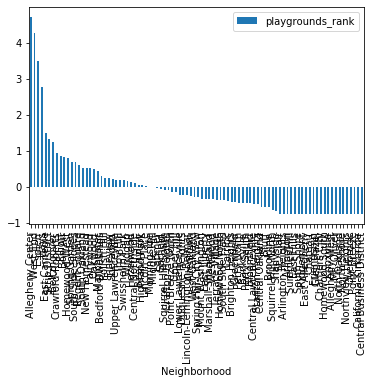

In [9]:
pg_plot = total.sort_values(by=["playgrounds_rank"], ascending=False).plot.bar(x="Neighborhood", y="playgrounds_rank")

## Income

In [10]:
income = pd.read_csv("https://data.wprdc.org/dataset/5b18c198-474c-4723-b735-cc5220ad43cc/resource/34842307-0da6-458a-9df3-a09ab3e3a489/download/aggregate-household-income-in-the-past-12-months-in-2015-inflation-adjusted-dollars.csv")
income.head()

,Neighborhood,Id,Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars),Margin of Error; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)
0,Allegheny Center,1,39947000,6437773
1,Allegheny West,2,23793300,22025939
2,Allentown,3,38303700,7490207.043
3,Arlington,4,35349900,6140662.723
4,Arlington Heights,5,2389600,1162393


In [11]:
income = income.filter(["Neighborhood","Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)"])
income = income.rename(columns={"Estimate; Aggregate household income in the past 12 months (in 2015 Inflation-adjusted dollars)":"aggregate household income"})
income.loc[income["Neighborhood"] == "Chateau", "aggregate household income"] = '0'
income.loc[income["Neighborhood"] == "South Shore", "aggregate household income"] = '0'
income["aggregate household income"] = income["aggregate household income"].apply(pd.to_numeric)
income.sort_values(by=["aggregate household income"], ascending=True)


,Neighborhood,aggregate household income
21,Chateau,0
71,South Shore,0
4,Arlington Heights,2389600
87,West End,3615800
78,St. Clair,3867600
...,...,...
63,Point Breeze,314958500
13,Brookline,366945900
76,Squirrel Hill North,577467500
68,Shadyside,605635700


In [12]:
new_total = pd.merge(left=total, right=income, left_on='Neighborhood', right_on='Neighborhood')
new_total["income by population"] = new_total["aggregate household income"].divide(new_total["population"], fill_value=0)
new_total.sort_values(by=["income by population"], ascending=False)

,Neighborhood,population,playgrounds_rank,aggregate household income,income by population
79,Strip District,616,1.312010,91738300,148925.811688
62,Point Breeze,5315,-0.764712,314958500,59258.419567
16,Central Business District,3629,-0.764712,210460000,57993.937724
65,Regent Square,928,0.613802,52288700,56345.581897
1,Allegheny West,462,-0.764712,23793300,51500.649351
...,...,...,...,...,...
87,West Oakland,2604,-0.273444,16339500,6274.769585
82,Terrace Village,3228,-0.368411,16879300,5229.027261
10,Bluff,6600,-0.570885,11005200,1667.454545
70,South Shore,19,-0.764712,0,0.000000


**Calculate Income Rank**

Income/population Data Analysis:

mean: $25,253

standard deviation: $17,994
    
max: Strip District, $148,926 / person, +6.873 rank

min: South Shore & Chateau, $0 / person, -1.403 rank

In [13]:
total = new_total
inc_mean = np.nansum(total.loc[:, "income by population"]) / num_neighborhoods
total["temp_stdDev"] = np.square(total["income by population"] - inc_mean)
inc_stdDev = np.sqrt(np.nansum(total.loc[:, "temp_stdDev"]) / num_neighborhoods)
total["income_rank"] = (total["income by population"] - inc_mean)/inc_stdDev

total.sort_values(by=["income by population"], ascending=False)


,Neighborhood,population,playgrounds_rank,aggregate household income,income by population,temp_stdDev,income_rank
79,Strip District,616,1.312010,91738300,148925.811688,1.529492e+10,6.872869
62,Point Breeze,5315,-0.764712,314958500,59258.419567,1.156356e+09,1.889776
16,Central Business District,3629,-0.764712,210460000,57993.937724,1.071957e+09,1.819505
65,Regent Square,928,0.613802,52288700,56345.581897,9.667371e+08,1.727900
1,Allegheny West,462,-0.764712,23793300,51500.649351,6.889294e+08,1.458653
...,...,...,...,...,...,...,...
87,West Oakland,2604,-0.273444,16339500,6274.769585,3.601803e+08,-1.054689
82,Terrace Village,3228,-0.368411,16879300,5229.027261,4.009669e+08,-1.112804
10,Bluff,6600,-0.570885,11005200,1667.454545,5.562867e+08,-1.310732
70,South Shore,19,-0.764712,0,0.000000,6.377234e+08,-1.403397


In [14]:
total = total.filter(["Neighborhood", "playgrounds_rank", "income_rank"])
total

,Neighborhood,playgrounds_rank,income_rank
0,Allegheny Center,4.719792,0.976000
1,Allegheny West,-0.764712,1.458653
2,Allentown,-0.253008,-0.551935
3,Arlington,-0.764712,-0.352299
4,Arlington Heights,-0.764712,-0.859146
...,...,...,...
85,Upper Lawrenceville,0.193895,-0.034611
86,West End,4.271747,-0.612290
87,West Oakland,-0.273444,-1.054689
88,Westwood,-0.347471,0.261568


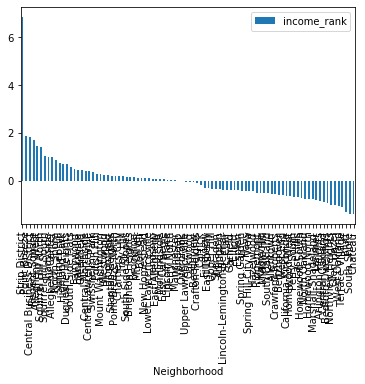

In [26]:
pg_plot = total.sort_values(by=["income_rank"], ascending=False).plot.bar(x="Neighborhood", y="income_rank")

## Environmental Factors

In [15]:
environment = pd.read_excel("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/9c46a88c-8fca-4839-9848-c2b819ecbf0f/download/natural-environment-conditions.xls")
environment.head()

,Neighborhood,Sector #,Population (2010),Land Area (acres),Landslide Prone (% land area),Undermined (% land area),Flood Plain (% land area),# Street Trees,Park Space (acres),Park Space (% of land area),Park Space (acres/1000 pers.),Greenway (% of land area),Woodland (% of land area),Cemetery (% of land area)
0,Allegheny Center,3,933,134.40,0.000000,0.000000,0.001637,22,55.264,0.411190,59.232583,0.0,0.000000,0.000000
1,Allegheny West,3,462,90.24,0.093273,0.000000,0.023105,229,7.182,0.079588,15.545455,0.0,0.042354,0.000000
2,Allentown,6,2500,188.80,0.270911,0.903528,0.000000,87,39.385,0.208607,15.754000,0.0,0.123093,0.000000
3,Arlington,7,1869,300.80,0.414182,0.572543,0.015170,79,6.747,0.022430,3.609952,0.0,0.294289,0.073075
4,Arlington Heights,7,244,84.48,0.398935,0.611955,0.000000,3,0.000,0.000000,0.000000,0.0,0.417969,0.000000


In [16]:
environment = environment.filter(["Neighborhood","Landslide Prone (% land area)", "Flood Plain (% land area)"])
environment["risk area"] = environment.loc[:,["Landslide Prone (% land area)", "Flood Plain (% land area)"]].sum(axis=1)
environment.sort_values(by=["risk area"], ascending=True)

,Neighborhood,Landslide Prone (% land area),Flood Plain (% land area),risk area
33,Friendship,0.000000,0.000000,0.000000
40,Homewood North,0.000000,0.000000,0.000000
63,Point Breeze North,0.000000,0.000000,0.000000
41,Homewood South,0.000000,0.000000,0.000000
27,East Hills,0.000000,0.000000,0.000000
...,...,...,...,...
79,Strip District,0.109380,0.542211,0.651591
72,South Side Slopes,0.663595,0.000000,0.663595
64,Polish Hill,0.750000,0.003799,0.753799
56,North Shore,0.000000,0.819585,0.819585


In [17]:
environment = environment.filter(["Neighborhood", "risk area"])
environment

,Neighborhood,risk area
0,Allegheny Center,0.001637
1,Allegheny West,0.116379
2,Allentown,0.270911
3,Arlington,0.429352
4,Arlington Heights,0.398935
...,...,...
85,Upper Lawrenceville,0.258187
86,West End,0.422039
87,West Oakland,0.645349
88,Westwood,0.152369


**Calculate Environment Rank**

Risk Area Data Analysis:

mean: 27% risk area

standard deviation: 22%

max: (several neighborhoods), 0% risk area, +1.236 rank

min: Fineview, 91.9% risk area, -2.949 rank

In [18]:
env_mean = np.nansum(environment.loc[:, "risk area"]) / num_neighborhoods
environment["temp_stdDev"] = np.square(environment["risk area"] - env_mean)
env_stdDev = np.sqrt(np.nansum(environment.loc[:, "temp_stdDev"]) / num_neighborhoods)

environment["environment_rank"] = ((environment["risk area"] - env_mean)/env_stdDev)*-2

environment.sort_values(by=["environment_rank"], ascending=False)


,Neighborhood,risk area,temp_stdDev,environment_rank
27,East Hills,0.000000,0.073777,2.472193
58,Oakwood,0.000000,0.073777,2.472193
33,Friendship,0.000000,0.073777,2.472193
40,Homewood North,0.000000,0.073777,2.472193
63,Point Breeze North,0.000000,0.073777,2.472193
...,...,...,...,...
79,Strip District,0.651591,0.144379,-3.458398
72,South Side Slopes,0.663595,0.153646,-3.567662
64,Polish Hill,0.753799,0.232498,-4.388668
56,North Shore,0.819585,0.300268,-4.987437


In [19]:
environment = environment.filter(["Neighborhood", "environment_rank"])

**merge with total**

In [20]:
new_total = pd.merge(left=total, right=environment, left_on='Neighborhood', right_on='Neighborhood')

In [21]:
total = new_total
total

,Neighborhood,playgrounds_rank,income_rank,environment_rank
0,Allegheny Center,4.719792,0.976000,2.457295
1,Allegheny West,-0.764712,1.458653,1.412949
2,Allentown,-0.253008,-0.551935,0.006439
3,Arlington,-0.764712,-0.352299,-1.435642
4,Arlington Heights,-0.764712,-0.859146,-1.158795
...,...,...,...,...
85,Upper Lawrenceville,0.193895,-0.034611,0.122252
86,West End,4.271747,-0.612290,-1.369085
87,West Oakland,-0.273444,-1.054689,-3.401586
88,Westwood,-0.347471,0.261568,1.085378


## Final Calculations

In [22]:
total["final_score"] = total["playgrounds_rank"] + total["income_rank"] + total["environment_rank"]
pd.set_option('display.max_rows', None)
total.sort_values(by=["final_score"], ascending=False)

,Neighborhood,playgrounds_rank,income_rank,environment_rank,final_score
0,Allegheny Center,4.719792,0.976000,2.457295,8.153086
79,Strip District,1.312010,6.872869,-3.458398,4.726481
26,East Carnegie,1.479605,0.053690,2.090025,3.623320
62,Point Breeze,-0.764712,1.889776,2.125709,3.250773
75,Squirrel Hill North,-0.652131,1.420826,2.433672,3.202367
30,Esplen,3.485323,-0.400146,-0.118641,2.966535
48,Manchester,0.436472,0.015209,2.466994,2.918674
58,Oakwood,0.480917,-0.049790,2.472193,2.903320
67,Shadyside,-0.672778,1.015362,2.372983,2.715568
63,Point Breeze North,-0.141898,0.208393,2.472193,2.538688


**All neighborhoods**

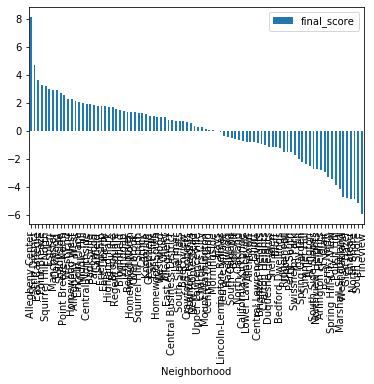

In [23]:
graph1 = total.sort_values(by=["final_score"], ascending=False).plot.bar(x="Neighborhood", y="final_score")

**Worst Neighborhoods**

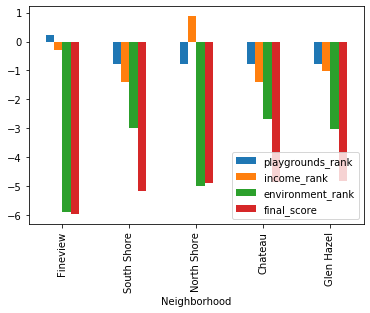

In [24]:
graph2 = total.sort_values(by=["final_score"], ascending=True).head().plot.bar(x="Neighborhood")

**Best Neighborhoods**

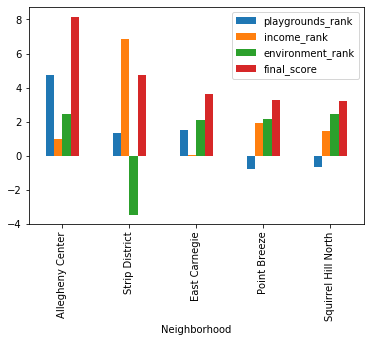

In [25]:
graph3 = total.sort_values(by=["final_score"], ascending=False).head().plot.bar(x="Neighborhood")